## BME i9400
## Fall 2024
### Homework 4: Stratified K-Fold Cross Validation and L2 Regularized Logistic Regression


**Due date: Wednesday, November 13th 2024, 11:59:59.987 PM EST**

In this homework, you will implement a logistic regression model with L2 regularization, and evaluate it using stratified K-Fold cross-validation.

Stratification refers to the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.

In the cells below, I have indicated places where code needs to be added with instructions contained in double hashtags (for example ## DO SOMETHING ##). 

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

### Set the random seed

In [12]:
## DO NOT MODIFY THIS CELL
np.random.seed(42)

### Load the data

In [13]:
## DO NOT MODIFY THIS CELL
df = pd.read_csv('parkinsons.csv')
labels = df["status"].values
features = df.drop(columns=["status", "name"]).values
features.shape, labels.shape

((195, 22), (195,))

### Create an instance of the StratifiedKFold class with 5 folds

In [14]:
## DO NOT MODIFY THIS CELL
skf = StratifiedKFold(n_splits=5)

### Task 1 
**Evaluate a logistic regression model on this dataset using 5-fold stratified cross-validation.**
- You should use the model object created in the above cell
- Do not regularize the classifier!
- Use a value for ```max_iter``` of 10000 and disregard any convergence warnings
- For each of the five folds, compute the area under the ROC curve and the average precision, storing each of them in a list
- Report the average area under the ROC curve and the average average precision across the five folds

In [15]:
rocs = []
prcs = []
max_iter = 10000
## Add code for cross-validation here
for i, (train_index, test_index) in enumerate(skf.split(features, labels)):
    print(f"Fold={i}")
    train_x=features[train_index]
    train_y=labels[train_index]
    test_x=features[test_index]
    test_y=labels[test_index]
    clf = LogisticRegression(max_iter=max_iter,penalty='l1', solver='saga', C=0.01) 
    clf.fit(train_x, train_y)
    y_pred_probs = clf.predict_proba(test_x)[:, 1]  # probability of the positive class
    roc_auc = roc_auc_score(test_y, y_pred_probs)   
    average_precision = average_precision_score(test_y, y_pred_probs)
    rocs.append(roc_auc)
    prcs.append(average_precision)
## Report AUROC and average precision here
print('roc_auc',rocs)
print('average_precision',prcs)

Fold=0
Fold=1
Fold=2
Fold=3
Fold=4
roc_auc [0.0, 0.31851851851851853, 0.1482758620689655, 0.4827586206896551, 0.11724137931034481]
average_precision [0.5726275645095634, 0.6854965621083362, 0.5863915386592894, 0.7972514987281502, 0.5727948903124059]


### Task 2
**Repeat Task 1, but this time adding L2 to the logistic regression model.**
- You must evaluate the following values for the hyperparameter ```C```
    - C: 0.01, 0.1, 1, 10, 100, 1000, 10000
- For each hyperparameter value, compute the average area under the ROC curve and the average average precision across the five folds, and store them in a list or numpy array
- Use a sufficiently large value for the ```max_iter``` parameter of the LogisticRegression class to avoid convergence warnings.
- Report the highest value of the average area under the ROC curve and the average average precision.
- Also report the hyperparameters that yield the best average area under the ROC curve and the average average precision.
- Create a plot with L2 hyperparameter on the x-axis, and average ROC and average precision on the y-axis (overlaid) -- use a logarithmic scale for the x-axis.


In [16]:
cc = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
rocs = np.zeros(shape = (len(cc), 5))
prcs = np.zeros(shape = (len(cc), 5))

## Add code for cross-validation here
for i, (train_index, test_index) in enumerate(skf.split(features, labels)):
    for j in range(len(cc)):
        print(f"Fold={i}, C={cc[j]}")
        train_x=features[train_index]
        train_y=labels[train_index]
        test_x=features[test_index]
        test_y=labels[test_index]
        clf = LogisticRegression(max_iter=max_iter,penalty='l2', solver='saga', C=cc[j]) 
        clf.fit(train_x, train_y)
        y_pred_probs = clf.predict_proba(test_x)[:, 1]  # probability of the positive class
        roc_auc = roc_auc_score(test_y, y_pred_probs)   
        average_precision = average_precision_score(test_y, y_pred_probs)
        rocs[j,i]=roc_auc
        prcs[j,i]=average_precision
## Report AUROC and average precision here
print('roc_auc',rocs)
print('average_precision',prcs)

Fold=0, C=0.001
Fold=0, C=0.01
Fold=0, C=0.1
Fold=0, C=1
Fold=0, C=10
Fold=0, C=100
Fold=0, C=1000
Fold=0, C=10000
Fold=1, C=0.001
Fold=1, C=0.01
Fold=1, C=0.1
Fold=1, C=1
Fold=1, C=10
Fold=1, C=100
Fold=1, C=1000
Fold=1, C=10000
Fold=2, C=0.001
Fold=2, C=0.01
Fold=2, C=0.1
Fold=2, C=1
Fold=2, C=10
Fold=2, C=100
Fold=2, C=1000
Fold=2, C=10000
Fold=3, C=0.001
Fold=3, C=0.01
Fold=3, C=0.1
Fold=3, C=1
Fold=3, C=10
Fold=3, C=100
Fold=3, C=1000
Fold=3, C=10000
Fold=4, C=0.001
Fold=4, C=0.01
Fold=4, C=0.1
Fold=4, C=1
Fold=4, C=10
Fold=4, C=100
Fold=4, C=1000
Fold=4, C=10000
roc_auc [[0.         0.47777778 0.41034483 0.48275862 0.08965517]
 [0.61851852 0.71481481 0.52758621 0.39655172 0.08275862]
 [0.98888889 0.81851852 0.59655172 0.47586207 0.10689655]
 [0.98888889 0.83333333 0.65172414 0.51724138 0.11034483]
 [0.98888889 0.83333333 0.66551724 0.53103448 0.11034483]
 [0.98888889 0.83333333 0.66551724 0.53103448 0.11034483]
 [0.98888889 0.83333333 0.66551724 0.53103448 0.11034483]
 [0.9888888

In [17]:
## Report the highest values of the average auroc and average average precision here
print('highest auroc',np.max(rocs.flatten()))
print('highest average average',np.max(prcs.flatten()))

highest auroc 0.9888888888888888
highest average average 0.9966641947843282


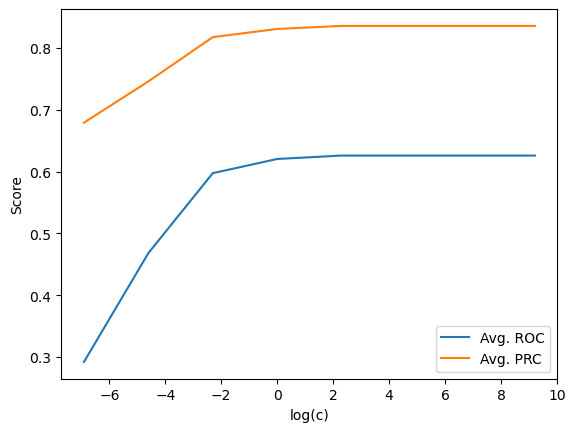

In [18]:
## Create the plot here
cc_arr=np.log(np.array(cc))
rocs_avg_arr=np.array(rocs.mean(axis=1))
prcs_avg_arr=np.array(prcs.mean(axis=1))
plt.figure()
plt.plot(cc_arr, rocs_avg_arr, label='Avg. ROC')
plt.plot(cc_arr, prcs_avg_arr, label='Avg. PRC')
plt.xlabel('log(c)')
plt.ylabel('Score')
plt.legend()
plt.show()